In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [1]:
np.random.seed(12)
races=["asian","black","hispanic","other","white"]
#Generate random data
voter_race=np.random.choice(a=races,
                           p=[0.05,0.15,0.25,0.05,0.5],
                           size=1000)
voter_age=stats.poisson.rvs(loc=18,
                           mu=30,
                           size=1000)
#Group age data by race
voter_frame=pd.DataFrame({"race":voter_race,"age":voter_age})
groups=voter_frame.groupby("race").groups
#Etract individual groups
asian=voter_age[groups["asian"]]
black=voter_age[groups["black"]]
hispanic=voter_age[groups["hispanic"]]
other=voter_age[groups["other"]]
white=voter_age[groups["white"]]
#Perform the ANOVA
stats.f_oneway(asian,black,hispanic,other,white)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('age~race',            #Model formula
         data=voter_frame).fit()
anova_result=sm.stats.anova_lm(model,typ=2)
print(anova_result)

             sum_sq     df         F    PR(>F)
race        199.369    4.0  1.774469  0.131732
Residual  27948.102  995.0       NaN       NaN


In [7]:
np.random.seed(12)
#Generate random data
voter_race=np.random.choice(a=races,
                           p=[0.05,0.15,0.25,0.05,0.5],
                           size=1000)

#Use a different distribution for white ages
white_ages=stats.poisson.rvs(loc=18,
                            mu=32,    #Average age of white people
                            size=1000)
voter_ages=stats.poisson.rvs(loc=18,
                            mu=32,    #Average age of people
                            size=1000)
voter_age=np.where(voter_race=="white",white_ages,voter_age)

#Group age data by race
voter_frame=pd.DataFrame({"race":voter_race,"age":voter_age})
groups=voter_frame.groupby("race").groups

#Extract individual groups
asian=voter_age[groups["asian"]]
black=voter_age[groups["black"]]
hispanic=voter_age[groups["hispanic"]]
other=voter_age[groups["other"]]
white=voter_age[groups["white"]]

#Perform the ANOVA
stats.f_oneway(asian,black,hispanic,other,white)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F_onewayResult(statistic=9.642070031781937, pvalue=1.1877197736468024e-07)

In [8]:
#Alternate method
model=ols('age~race',   #Model formula
         data=voter_frame).fit()
anova_result=sm.stats.anova_lm(model,typ=2)
print(anova_result)

               sum_sq     df        F        PR(>F)
race       1162.89467    4.0  9.64207  1.187720e-07
Residual  30000.82433  995.0      NaN           NaN


In [9]:
#Get all race pairs
race_pairs=[]

for race1 in range(4):
    for race2 in range(race1+1,5):
        race_pairs.append((races[race1],races[race2]))

#Conduct t-test on each pair
for race1,race2 in race_pairs:
    print(race1,race2)
    print(stats.ttest_ind(voter_age[groups[race1]],
                         voter_age[groups[race2]]))

asian black


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=1.4723166654510063, pvalue=0.14259864916065687)
asian hispanic


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.7952576949464497, pvalue=0.42712310624411387)
asian other


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=0.023943564194904926, pvalue=0.9809494819541007)
asian white


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.4974773227453835, pvalue=0.1348355513746021)
black hispanic


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.9779887872139286, pvalue=0.328687679434698)
black other


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.537940275215305, pvalue=0.12568427083007871)
black white


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-5.202056491005275, pvalue=2.633606776382728e-07)
hispanic other


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-0.8181367221979297, pvalue=0.41394624196541574)
hispanic white


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-4.700227080302682, pvalue=3.0872364677332913e-06)
other white


<IPython.core.display.Javascript object>

Ttest_indResult(statistic=-1.6291313572855386, pvalue=0.10384458120219324)


TUKEYS TEST

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


<IPython.core.display.Javascript object>

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.3353,0.6024,-3.914,1.2433,False
asian,hispanic,-0.7593,0.9,-3.2171,1.6984,False
asian,other,-0.0264,0.9,-3.1282,3.0754,False
asian,white,1.2729,0.568,-1.084,3.6297,False
black,hispanic,0.576,0.8351,-0.9907,2.1428,False
black,other,1.309,0.5792,-1.1477,3.7657,False
black,white,2.6082,0.001,1.205,4.0114,True
hispanic,other,0.733,0.9,-1.5965,3.0624,False
hispanic,white,2.0322,0.001,0.8659,3.1984,True
other,white,1.2992,0.4991,-0.9236,3.522,False


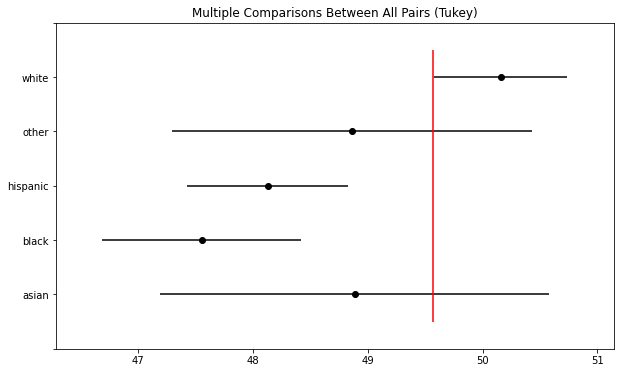

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey=pairwise_tukeyhsd(endog=voter_age,  #Data
                       groups=voter_race, #Groups
                       alpha=0.05)        #Significance level

tukey.plot_simultaneous() #Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5,color="red")

tukey.summary()   #See test summary